In [ ]:
# TODO: PCA partitions
!pwd
!ls ../../data/aging_brain/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

import pickle 

data_location = "../../data/aging_brain/"

young = pickle.load(open(data_location + "aging_brain_young.pickle",mode='rb'))
old = pickle.load(open(data_location + "aging_brain_old.pickle",mode='rb'))

# filtered = pickle.load(open(data_location + "aging_brain_filtered.pickle",mode='rb'))

batch_encoding = np.loadtxt(data_location + 'aging_batch_encoding.tsv')
batch_encoding = batch_encoding.astype(dtype=bool)

young_mask = np.zeros(37069,dtype=bool)
old_mask = np.zeros(37069,dtype=bool)

young_mask[:young.shape[0]] = True
old_mask[young.shape[0]:] = True


In [ ]:
sc.pp.neighbors(filtered)
sc.tl.umap(filtered)
sc.tl.louvain(filtered)
sc.pl.umap(filtered,color='louvain')


In [ ]:
# We must find all ways of combining 8 mice into 2 partitions of 4. 

# First find the binary representation of all numbers up to 256.

up = np.unpackbits(np.arange(256).astype(dtype='uint8')).reshape((256,8))

# Find out how many digits are 1

sums = np.sum(up,axis=1)

# Then select all representations where only 4 positions are set to 1.

partitions = up[:128][sums[:128] == 4]

partitions.shape

In [ ]:
# Now we must select features that are reasonably predictable within the dataset

## Selecting Predictable Features

In [2]:
import sys
sys.path.append('../../')
import rusty_axe.lumberjack as lumberjack



selection_forest = lumberjack.fit(
    young.X,
    header=young.var_names,
    p=6,
    trees=50,
    ifs=500,
    ofs=500,
    ss=300,
    depth=9,
    leaves=50,
    sfr=0,
    norm='l2',
    dispersion_mode = "ssme",
    standardize="true",
    reduction=3,
    reduce_input='true',
    reduce_output='false'
)

Setting context
Input:(16028, 2000)
Output:(16028, 2000)
Generating trees
Running /home/boris/battle/rf_5/rusty_axe/bin/rf_5
Command: /home/boris/battle/rf_5/rusty_axe/bin/rf_5 -ic /tmp/tmplaubk4ks/input.counts -oc /tmp/tmplaubk4ks/output.counts -o /tmp/tmplaubk4ks/tmp -auto -ifh /tmp/tmplaubk4ks/tmp.ifh -ofh /tmp/tmplaubk4ks/tmp.ofh -p 6 -trees 50 -ifs 500 -ofs 500 -ss 300 -depth 9 -leaves 50 -sfr 0 -norm l2 -dispersion_mode ssme -standardize true -reduction 3 -reduce_input true -reduce_output false
Read parameters

0 0 1.8931357860565186 0 0 0 2.507997751235962 0 0 0 0
100

0 0 0 0 0 0 0 0 0 0 200
300

0 0 0 0 0 0 0 0 0 0 400
500

0 0 0 0 0 0 0 0 0 0 600
700

0 0 0 0 2.0017569065093994 0 0 0 0 0 800
900

0 0 0 0 0 0 0 1.5864790678024292 0 0 1000
1100

0 0 0 0 0 0 0 3.541308879852295 0 0 1200
1300

0 0 0 0 0 0 1.5142695903778076 0 0 0 1400
1500

0 0 0 0 0 0 0 0 0 0 1600
1700

0 0 0 0 0 0 0 0 0 0 1800
1900

0 0 0 0 0 0 0 0 0 0 2000
2100

0 0 0 0 1.4800764322280884 0 0 1.480076432228088

Computing tree 2
Computing tree 7
Computing tree 4
Computing tree 18
Computing tree 26
Computing tree 13
Computing tree 5
Computing tree 19
Computing tree 21
Computing tree 8
Computing tree 27
Computing tree 14
Computing tree 23
Computing tree 9
Computing tree 22
Computing tree 20
Computing tree 28
Computing tree 15
Computing tree 24
Computing tree 10
Computing tree 11
Computing tree 16
Computing tree 29
Computing tree 37
Computing tree 17
Computing tree 31
Computing tree 34
Computing tree 43
Computing tree 30
Computing tree 38
Computing tree 40
Computing tree 44
Computing tree 32
Computing tree 35
Computing tree 39
Computing tree 36
Computing tree 41
Computing tree 45
Computing tree 42
Computing tree 33
Computing tree 46
Computing tree 48
Computing tree 47
Computing tree 49


Rust observes: /home/boris/battle/rf_5/rusty_axe/bin/rf_5

CHECK OUTPUT
['tmp.tree_19.compact', 'tmp.tree_49.compact', 'tmp.ofh', 'tmp.tree_39.compact', 'tmp.tree_32.compact', 'tmp.tree_38.compact', 'tmp.tree_45.

In [3]:
# selection_forest.set_cache(True)
selection_forest.backup(data_location + "selection_forest_4")

Saving forest
../../data/aging_brain/selection_forest_4


Predicting tree:49
Fraction Unexplained:0.6650950851758846


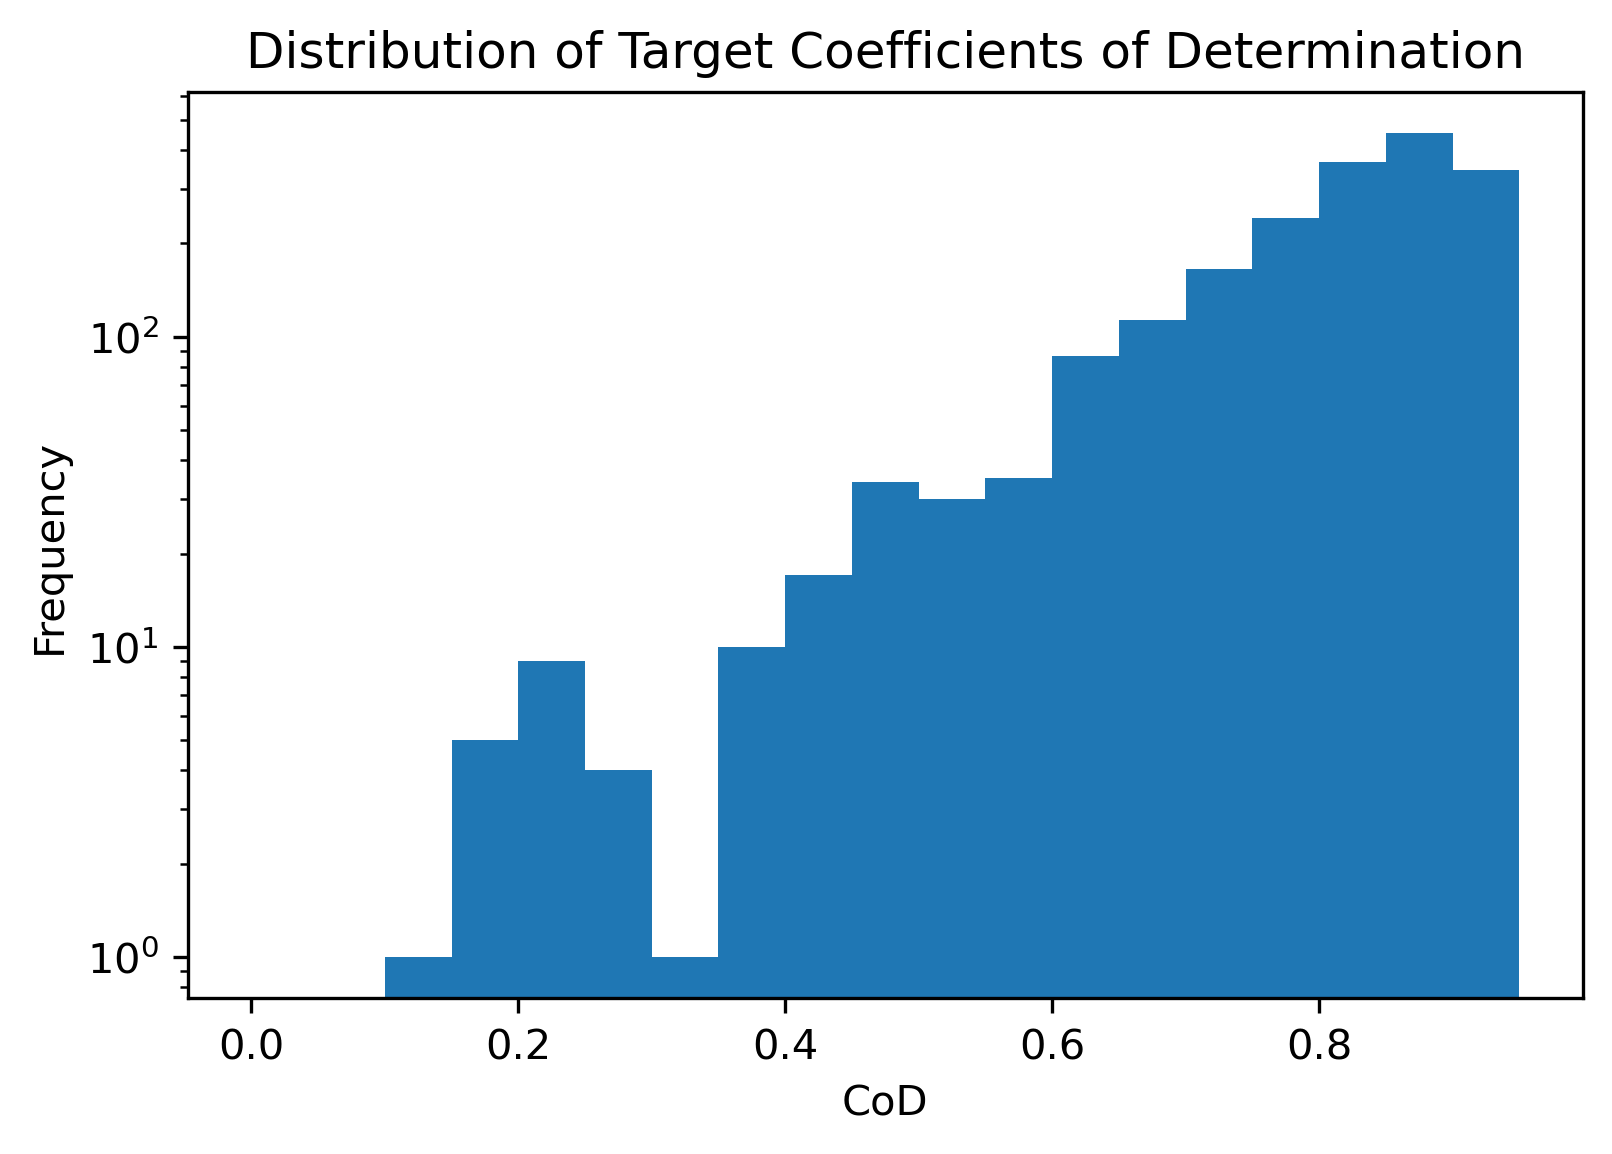

(array(['Cldn11', 'Plp1', 'Mog', 'Mag', 'Mal', 'Ermn', 'Opalin', 'Trf',
       'Tubb4a', 'Ppp1r14a'], dtype='<U13'), array([0.14473038, 0.16223783, 0.18386063, 0.18790939, 0.19358915,
       0.1940862 , 0.20723898, 0.21055632, 0.21254294, 0.21817824]))
(array(['Ccl5', 'Calca', 'Rhox5', 'Krt73', 'Cga', 'Gdf3', 'Krtdap', 'Ly6d',
       'Fetub', 'Lhfpl1'], dtype='<U13'), array([0.97122817, 0.97142726, 0.97270366, 0.97289924, 0.97431727,
       0.97462247, 0.97519512, 0.97554625, 0.97742106, 0.98930165]))
[  641   553  1986  2073 13929  9579  9385  5581  5748  1659] [0.24354786 0.25451219 0.2578267  0.25990788 0.26008906 0.2619081
 0.26712541 0.26726525 0.26827525 0.26994048]
[ 6022  7160  1112  2410 14959 14967 14450  1655  1720 13836] [0.9120069  0.91486452 0.925852   0.93379508 0.93433898 0.94349716
 0.94448001 0.94668649 0.951491   0.9516324 ]


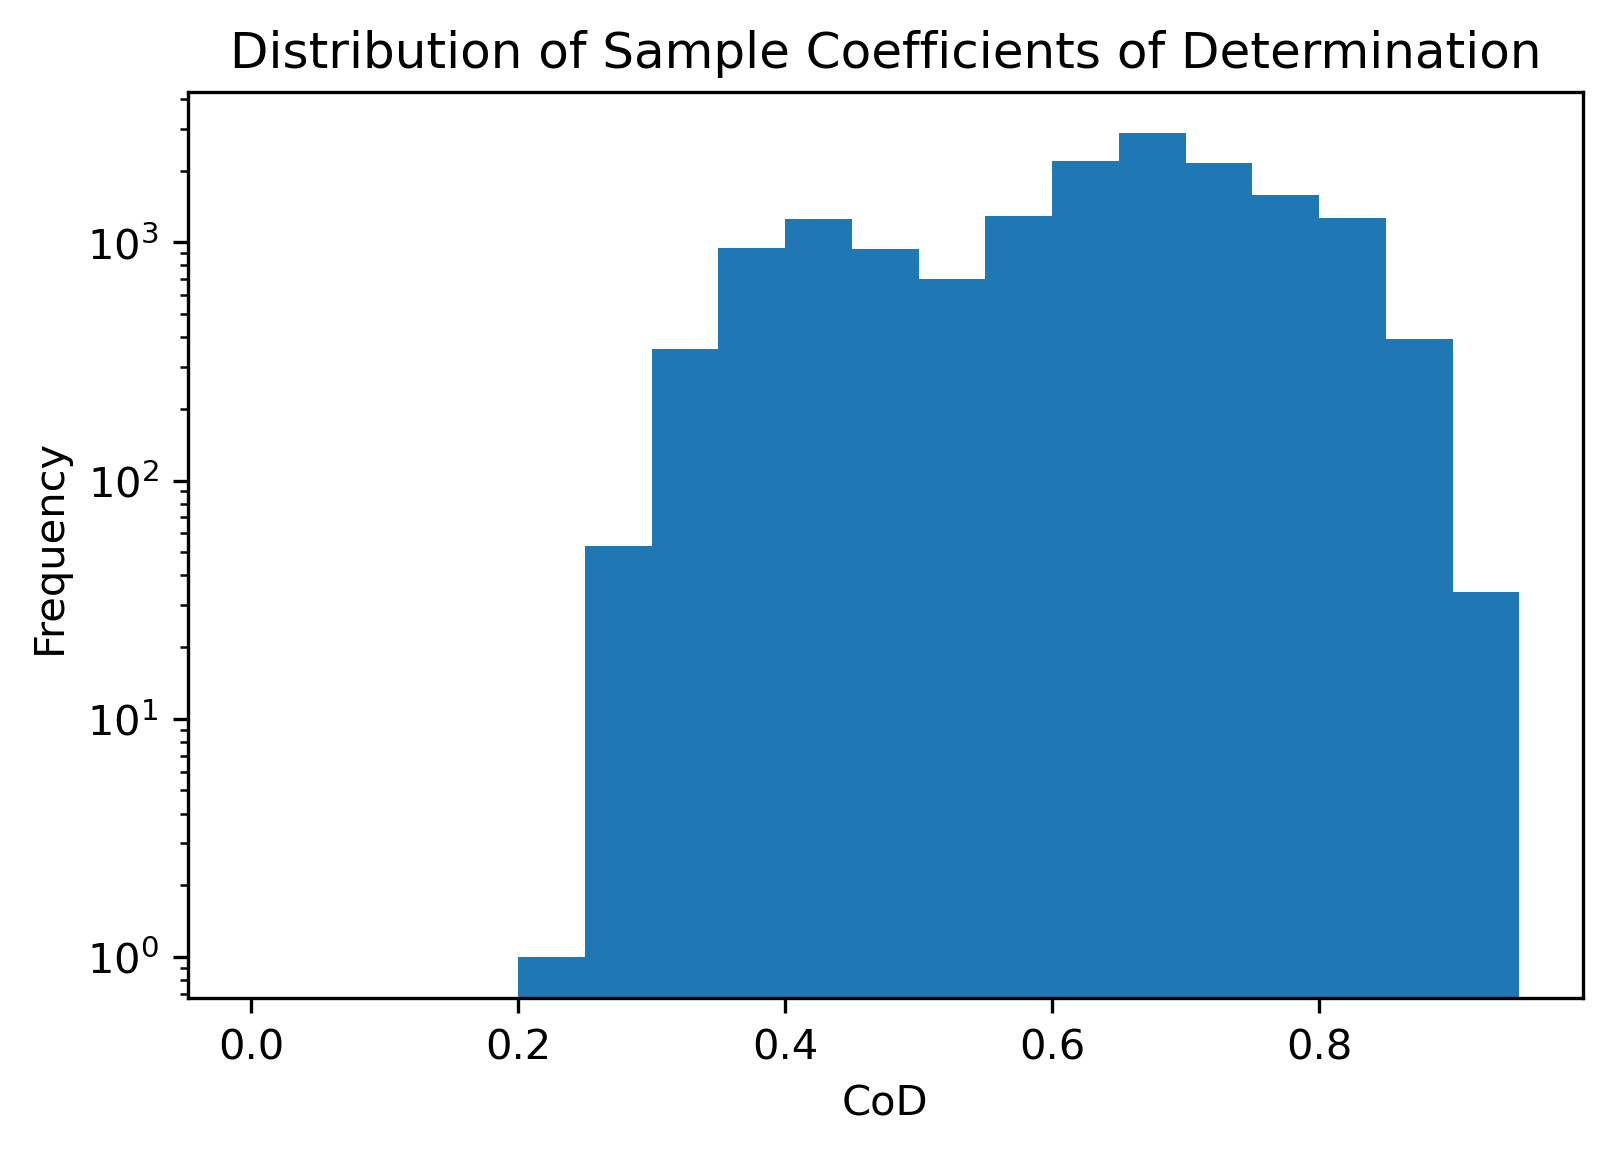

(array([0.65369459, 0.7648686 , 0.86920113, ..., 0.62990755, 0.65361374,
        0.64946373]),
 array([0.55132951, 0.61871396, 0.66413447, ..., 0.73481175, 0.69282202,
        0.73642703]))

In [4]:
selection_forest.self_prediction = selection_forest.predict(young.X)
selection_forest.self_prediction.prediction_report()

In [ ]:
feature_residuals = selection_forest.self_prediction.residuals()


In [ ]:
centered = young.X - np.mean(young.X,axis=0)
null_squared_residual = np.power(centered,2)
feature_null = np.sum(null_squared_residual,axis=0) + 1

forest_squared_residuals = np.power(feature_residuals,2)

forest_feature_error = np.sum(forest_squared_residuals,axis=0) + 1
forest_feature_remaining = forest_feature_error/feature_null


In [ ]:
plt.figure()
plt.hist(forest_feature_remaining.copy(),bins=50)
plt.show()

filtered_feature_mask = forest_feature_remaining < .6

print(np.sum(filtered_feature_mask))

In [ ]:
filtered_feature_mask = np.zeros(2000,dtype=bool)

for feature in cv_forest.output_features:
    f_i = list(young.var_names).index(feature)
    filtered_feature_mask[f_i] = True

In [ ]:
# Now we must take the predictable features and train cross-validated forests on them

In [ ]:
young_filtered = young[:,filtered_feature_mask]
young_filtered.shape
old_filtered = old[:,filtered_feature_mask]
old_filtered.shape

In [ ]:
# data_location = "/Users/bbrener1/battle/rusty_forest_4/data/aging_brain/"
filtered_feature_mask = np.loadtxt(data_location + "filtered_feature_mask.txt")
filtered_feature_mask = filtered_feature_mask.astype(dtype=bool)

young_filtered = young[:,filtered_feature_mask]
young_filtered.shape
old_filtered = old[:,filtered_feature_mask]
old_filtered.shape

In [ ]:
np.savetxt(data_location + "young_filtered.tsv",young_filtered.X)
np.savetxt(data_location + "old_filtered.tsv",old_filtered.X)
np.savetxt(data_location + "filtered_gene_header.txt",young_filtered.var_names,fmt='%s')
np.savetxt(data_location + "filtered_feature_mask.txt", filtered_feature_mask)

## Training The CV Forest

In [ ]:

import sys
# sys.path.append('/localscratch/bbrener1/rusty_forest_v3/src')
sys.path.append('../')
from rusty_axe import tree_reader as tr 
from rusty_axe import lumberjack

cv_forest = lumberjack.fit(
#     young_filtered.X,
#     header=young_filtered.var_names,
    young.X,
    header=young.var_names,
    trees=100,
    ifs=700,
    ofs=700,
    ss=300,
    depth=7,
    leaves=100,
    dispersion_mode='ssme',
    sfr=0,
    standardize = 'true',
    norm='l1',
    reduction = 10,
    p=8,
    reduce_input='true',
    reduce_output='true'
)
cv_forest.set_cache(True)
cv_forest.backup(data_location + "cv_forest_14")


# Should be done before 25 (15 min)

In [ ]:

# for f in cv_forest.output_features:
#     if "cdk" in f.lower():
#         print(f)

# len(cv_forest.nodes())
# cv_forest.trim(.005)

# cv_forest.trees[0].plot()

# max([n.level for n in cv_forest.nodes()])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

import sys
# sys.path.append('/localscratch/bbrener1/rusty_forest_v3/src')
sys.path.append('../')
sys.path.append('../rusty_axe')
from rusty_axe import tree_reader as tr 
from rusty_axe import lumberjack

data_location = "/Users/bbrener1/battle/rf_5/data/aging_brain/"
# data_location = "../data/aging_brain/"

cv_forest = tr.Forest.load(data_location + 'cv_forest_trimmed_extra')

# cv_forest.arguments

In [ ]:
# cv_forest.trim(.01)
# len(cv_forest.nodes())
cv_forest.output_features.shape
# cv_forest.compute_cache()

In [ ]:
cv_forest.reset_split_clusters()
cv_forest.interpret_splits(
    k=50,
    pca=100,
    depth=10,
    metric="cosine",
    mode='partial',
    relatives=True
)

In [ ]:
cv_forest.maximum_spanning_tree(mode='samples')

In [ ]:
cv_forest.tsne_coordinates = filtered.obsm['X_umap'][young_mask]
cv_forest.html_tree_summary(n=5)

In [ ]:
cv_forest.self_prediction = cv_forest.predict(cv_forest.output)
cv_forest.self_prediction.node_sample_encoding()

In [ ]:
cv_forest.self_prediction.prediction_report()

In [ ]:
# cv_forest.old_prediction = cv_forest.predict(old.X.T[filtered_feature_mask].T)
# cv_forest.old_prediction.prediction_report()
data_location

## Comparing Different Mouse Partitions

### Comparing Features

In [ ]:
# for i,partition in enumerate(partitions):
#     partition = np.array(partition).astype(dtype=bool)
#     partition_mask = np.any(batch_encoding[young_mask,:8][:,partition],axis=1)
#     sample_indices = np.arange(young_filtered.X.shape[0])[partition_mask]
#     sub_forest = cv_forest.derive_samples(sample_indices)
#     sub_forest.backup(data_location + f"sub_forest_{i}")
#     del(sub_forest)

for i,partition in list(enumerate(partitions)):
    partition = np.array(partition).astype(dtype=bool)
    partition_mask = np.any(batch_encoding[young_mask,:8][:,partition],axis=1)
    sub_forest = tr.Forest.load(data_location + f"sub_forest_{i}")
    sub_forest.self_prediction = sub_forest.predict(young_filtered.X[partition_mask])
    sub_forest.self_prediction.node_sample_encoding()
    sub_forest.self_prediction.node_sample_r2()
    sub_forest.test_prediction = sub_forest.predict(young_filtered.X[~partition_mask])
    sub_forest.test_prediction.node_sample_encoding()
    sub_forest.test_prediction.node_sample_r2()
    sub_forest.backup(data_location + f"sub_forest_{i}_cached")
    del(sub_forest)

# determination_spread = np.zeros((39,20))
# self_determination_spread = np.zeros((39,20))
# other_determination_spread = np.zeros((39,20))

# for i,partition in enumerate(partitions[:21]):
#     print("+++++++++++++++++++")
#     print(i)
#     print("+++++++++++++++++++")
#     partition = np.array(partition).astype(dtype=bool)
#     partition_mask = np.any(batch_encoding[young_mask,:8][:,partition],axis=1)
#     sub_forest = tr.Forest.load(data_location + "restricted_sub_forest/" + f"sub_forest_{i}_cached")
#     for factor_index in range(1,39):
#         factor = sub_forest.split_clusters[factor_index]
#         self_fvu,other_fvu,_ = sub_forest.self_prediction.compare_factor_fvu(sub_forest.test_prediction,factor)
#         other_determination_spread[factor_index,i] = 1-other_fvu
#         delta = other_fvu - self_fvu
#         determination_spread[factor_index,i] = delta
#     del(sub_forest)

In [ ]:
mean_spread = np.mean(determination_spread,axis=1)
spread_variance = np.var(determination_spread,axis=1)
mean_sort = np.argsort(mean_spread)
var_sort = np.argsort(spread_variance)

plt.figure()
for i in range(39):
    plt.scatter(np.array([i,]*20),determination_spread[var_sort[i]],s=2,c='blue')
plt.scatter(np.arange(39),mean_spread[var_sort],c='red')
plt.xticks(np.arange(39),var_sort,rotation=90)
plt.show()    


plt.figure()
plt.title("Mean Prediction Error Young vs Young and Young vs Old")
for i in range(39):
    plt.scatter(np.array([i,]*20),determination_spread[mean_sort[i]],s=2,c='blue')
plt.scatter(np.arange(39),mean_spread[mean_sort],c='red')
plt.xticks(np.arange(39),mean_sort,rotation=90)
plt.show()    

print(list(enumerate(np.sqrt(spread_variance))))

In [ ]:
for factor in cv_forest.split_clusters[1:]:
    print("+++++++++++++++++++++")
    print(f"Factor {factor.name()}")
    print("+++++++++++++++++++++")
    cv_forest.self_prediction.compare_factor_fvu(cv_forest.old_prediction, factor)

In [ ]:
len(cv_forest.split_clusters)

In [ ]:
self_fvu = [1.,]
old_fvu = [1.,]

for factor in cv_forest.split_clusters[1:]:
    print("++++++++++++++++++++")
    print(factor.name())
    print("++++++++++++++++++++")
    (sfvu,olfvu,olmwu) = cv_forest.self_prediction.compare_factor_fvu(cv_forest.old_prediction,factor,plot=True)
    self_fvu.append(sfvu)
    old_fvu.append(olfvu)

self_cod = 1 - np.array(self_fvu) 
old_cod = 1 - np.array(old_fvu)
# other_cod = 1 - np.array(other_fvu)


In [ ]:

old_delta = self_cod - old_cod
delta_sort = np.argsort(old_delta)

print(list(zip(delta_sort,old_delta[delta_sort])))

# selected_labels = set([7,27,16,35])

plt.figure()
plt.title("Coefficient of Determination Ratio")
plt.plot([0,.5],[0,.5],label="Ideal Fit", color='red')
for i,(p1,p2) in enumerate(zip(self_cod,old_cod)):
        plt.text(p1+.005,p2-.01,str(i),fontsize=5)

#     if i in selected_labels:
#         plt.text(p1+.005,p2-.01,str(i),fontsize=10)
#         plt.scatter([p1,],[p2,],s=10,color='blue')
plt.scatter(self_cod,old_cod,label="Old Mice",s=2,color='blue')
plt.legend()
plt.xlabel("Trained COD")
plt.ylabel("Observed COD")
plt.show()

In [ ]:


old_delta = self_cod - old_cod
delta_sort = np.argsort(old_delta)

cod_sort = np.argsort(self_cod)

# self_min = self_cod - (1.5*mean_spread)
# self_max = self_cod + (1.5*mean_spread)

selected_labels = set([7,27,14,1,22])


print(list(zip(delta_sort,old_delta[delta_sort])))

plt.figure(figsize=(4,3))
plt.title("Coefficient of Determination Ratio, Young vs Old")
plt.plot([0,.5],[0,.5],label="Ideal Fit", color='red')
for i,(p1,p2) in enumerate(zip(self_cod,old_cod)):
    if i in selected_labels:
        plt.text(p1+.003,p2-.005,str(i),fontsize=10)
        plt.scatter([p1,],[p2,],color='green',s=10)
plt.scatter([],[],color='green',label='Selected Factors')
# plt.fill_between(self_cod[cod_sort],self_min[cod_sort],self_max[cod_sort])
plt.scatter(self_cod,old_cod,s=2)
plt.legend()
plt.xlabel("Trained COD")
plt.ylabel("Observed COD")
plt.xlim(0,.4)
plt.ylim(0,.4)
plt.show()

In [ ]:
selected_labels = set([7,27,14,1,22])

plt.figure(figsize=(5,4))
plt.title("Mean Prediction Discrepancy,\n Young vs Young and Young vs Old")
for i in range(39):
    plt.scatter(np.array([i,]*20),determination_spread[mean_sort[i]],s=2,c='blue')

spread_min = np.min(determination_spread.flatten())    
for i in range(39):
    if mean_sort[i] in selected_labels:
        plt.scatter([i,],[spread_min,],marker="*",color='black')
plt.scatter([],[],color='black',label='Significant')
plt.scatter([],[],color='blue',label="Bootstrapped Young vs Young Δ COD") #phantom scatter to apply label of blue dots
plt.scatter(np.arange(39),mean_spread[mean_sort],c='red',label="Mean Δ COD Young vs Young")
plt.scatter(np.arange(39),old_delta[mean_sort],c='green',label="Mean Δ COD Young vs Old")
plt.xticks(np.arange(39),mean_sort,rotation=90,fontsize=8)
plt.xlabel("Factor")
plt.ylabel("Difference in Coefficient of Determination")
plt.legend()
plt.show()    


In [ ]:
mean_determination = np.mean(other_determination_spread,axis=1)
mean_sort = np.argsort(mean_determination)

selected_labels = set([7,27,14,1,22])

plt.figure(figsize=(4,3))
plt.title("Factor COD",fontsize=16)
for i in range(39):
    plt.scatter(np.array([i,]*20),other_determination_spread[mean_sort[i]],s=1,c='blue')
    
for i in range(39):
    if mean_sort[i] in selected_labels:
        plt.scatter([i,],[spread_min,],marker="*",color='black')
plt.scatter([],[],color='black',label='Significant')

plt.scatter(np.arange(39),mean_determination[mean_sort],c='red',label="Young vs Young (Mean)",alpha=.5)
plt.scatter(np.arange(39),old_cod[mean_sort],label="Young Vs Old",c='green',alpha=.5)
plt.scatter([],[],color='blue',label="Bootstraps")
plt.xticks(np.arange(39),mean_sort,rotation=90,fontsize=8)
plt.legend()
plt.ylabel("COD")
plt.xlabel("Factor")
plt.show()    


In [ ]:
print(mean_determination[13])
print(old_cod[13])

In [ ]:
f_i = 22
print(mean_determination[f_i])
print(np.min(other_determination_spread[f_i]))
print(np.max(other_determination_spread[f_i]))
print(old_cod[f_i])

In [ ]:
delta_z = np.abs(old_delta/np.sqrt(spread_variance))
z_sort = np.argsort(delta_z[1:])
z_sort + 1

In [ ]:
print(list(zip(z_sort+1,delta_z[1:][z_sort])))

In [ ]:
# Volcano plot plotting differences in COD by significance and magnitude. 

selected_labels = set([7,27,16,1,30,14,22,29])

plt.figure(figsize=(3.5,3))
plt.title("Δ COD vs Z Score")
plt.scatter(old_delta[1:],delta_z[1:],s=10)
for i,(p1,p2) in enumerate(zip(old_delta[1:],delta_z[1:])):
    if i+1 in selected_labels:
        plt.text(p1+.003,p2-.005,str(i+1),fontsize=8)
plt.ylabel("Z Score")
plt.xlabel("Δ COD")
plt.plot([-.14,.14,],[3.3,3.3],'--',label='Significance: \n P > .001',color='red')
plt.plot([.02,.02,],[0,16],'--',color='green',label='ΔCOD > 2%')
plt.plot([-.02,-.02,],[0,16],'--',color='lightgray',label='ΔCOD < 2%')
plt.xlim(-.14,.14)
plt.legend(fontsize=8)
plt.show()

In [ ]:
from matplotlib.colors import DivergingNorm

factor = cv_forest.split_clusters[7]
sister_scores = factor.sister_scores()

fig = plt.figure(figsize=(3,2.5))
plt.title(
    f"Distribution of Samples \nIn {factor.name()} (Red) vs Its Sisters (Blue)")
plt.scatter(*cv_forest.tsne_coordinates.T, s=1,
            alpha=.6, c=sister_scores, norm=DivergingNorm(0), cmap='bwr')
plt.colorbar(label="Sister Score")
plt.ylabel("tSNE Coordinates (AU)")
plt.xlabel("tSNE Coordinates (AU)")
plt.show()

### Comparing Cell Type Populations

In [ ]:
self_fraction_spread = np.zeros((39,20))
other_fraction_spread = np.zeros((39,20))

for i,partition in enumerate(partitions[:20]):
    print("+++++++++++++++++++")
    print(i)
    print("+++++++++++++++++++")
    partition = np.array(partition).astype(dtype=bool)
    partition_mask = np.any(batch_encoding[young_mask,:8][:,partition],axis=1)
    sub_forest = tr.Forest.load(data_location + "restricted_sub_forest/" + f"sub_forest_{i}_cached")
    for factor_index in range(1,39):
        factor = sub_forest.split_clusters[factor_index]
        self_fraction,other_fraction,_ = sub_forest.self_prediction.compare_factor_fractions(sub_forest.test_prediction,factor)
        self_fraction_spread[factor_index,i] = self_fraction
        other_fraction_spread[factor_index,i] = other_fraction
    del(sub_forest)

In [ ]:
mean_fraction = np.mean(other_fraction_spread,axis=1)
fraction_sort = np.argsort(mean_fraction)

plt.figure(figsize=(5,4))
plt.title("Factor Fraction")
for i in range(1,39):
    plt.scatter(np.array([i,]*20),other_fraction_spread[fraction_sort[i]],s=1,c='blue')
    
for i in range(1,39):
    if fraction_sort[i] in selected_labels:
        plt.scatter([i,],[.3,],marker="*",color='black')

plt.scatter([],[],color='black',label='Significant')

plt.scatter(np.arange(1,39),mean_fraction[fraction_sort[1:]],c='red',label="Young vs Young (Mean)",alpha=.5)
plt.scatter([],[],color='blue',label="Bootstraps")
plt.scatter(np.arange(1,39),np.array(old_fractions)[fraction_sort[1:]],label="Old Fraction")
plt.xticks(np.arange(1,39),fraction_sort[1:],rotation=90,fontsize=8)
plt.legend()
plt.ylabel("Fraction")
plt.xlabel("Factor")
plt.show()    


In [ ]:
old_fractions = [0,]
for factor in cv_forest.split_clusters[1:]:
    self_fraction,old_fraction,_ = cv_forest.self_prediction.compare_factor_fractions(cv_forest.old_prediction,factor)
    old_fractions.append(old_fraction)

In [ ]:
mouse_ratios = np.zeros((39,8))


for i,mouse in enumerate(batch_encoding[young_mask].T[:8]):
    for j,factor in enumerate(cv_forest.split_clusters[1:]):
        node_encoding = cv_forest.node_sample_encoding(factor.nodes)[mouse]
        parent_encoding = cv_forest.node_sample_encoding(factor.parents())[mouse]
#         node_pop = np.sum(node_encoding,axis=0)
#         parent_pop = np.sum(parent_encoding,axis=0)
#         ratio = (node_pop+1)/(parent_pop+1)
#         mean_ratio = np.mean(ratio)
        node_pop = np.sum(node_encoding)
        parent_pop = np.sum(parent_encoding)
        mean_ratio = (node_pop+1)/(parent_pop+1)
        mouse_ratios[j+1,i] = mean_ratio

old_mouse_ratios = np.zeros((39,8))


for i,mouse in enumerate(batch_encoding[old_mask].T[8:]):
    for j,factor in enumerate(cv_forest.split_clusters[1:]):
        nodes = [n for n in factor.nodes if n.parent is not None]
        parents = [n.parent for n in nodes]
        node_indices = [n.index for n in nodes]
        parent_indices = [p.index for p in parents]
        node_encoding = cv_forest.old_prediction.node_sample_encoding()[node_indices].T[mouse]
        parent_encoding = cv_forest.old_prediction.node_sample_encoding()[parent_indices].T[mouse]
#         node_pop = np.sum(node_encoding,axis=0)
#         parent_pop = np.sum(parent_encoding,axis=0)
#         ratio = (node_pop+1)/(parent_pop+1)
#         mean_ratio = np.mean(ratio)
        node_pop = np.sum(node_encoding)
        parent_pop = np.sum(parent_encoding)
        mean_ratio = (node_pop+1)/(parent_pop+1)
        old_mouse_ratios[j+1,i] = mean_ratio


In [ ]:
selected_labels = set([27,34,13,21,6,7])

plt.figure(figsize=(14,2.5))
plt.title("Factor fraction, young vs old")
for mouse in mouse_ratios.T:
    plt.scatter(np.arange(38)-.1,mouse[fraction_sort][1:],s=2,c='blue')
for mouse in old_mouse_ratios.T:
    plt.scatter(np.arange(38)+.1,mouse[fraction_sort][1:],s=2,c='red')
for i,fs in list(enumerate(fraction_sort))[1:]:
    if fs in selected_labels:
        plt.scatter([i-1,],.1,marker="*",c='black')
plt.scatter([],[],c='blue',label="Young")
plt.scatter([],[],c='red',label='Old')
plt.scatter([],[],c='black',label='Significant')
for i in range(38):
    plt.plot([i+.5,i+.5],[.1,.9],"--",linewidth=.5,color='lightgray')

plt.xticks(np.arange(38),labels=fraction_sort[1:],rotation=90,fontsize=10)
plt.legend()
plt.xlabel("Factors")
plt.ylabel("Fraction of Parent")
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

ratio_mwus = []

for i in range(1,39):
    mwu = mannwhitneyu(mouse_ratios[i],old_mouse_ratios[i])
    print("++++++++++++++++++")
    print(i)
    print(mwu)
    print("++++++++++++++++++")
    ratio_mwus.append(mwu)

In [ ]:
mwu_sort = np.argsort([rm[1] for rm in ratio_mwus]) + 1

for i in range(1,38):
    print(mwu_sort[i])
    print(ratio_mwus[mwu_sort[i]-1])

## Comparing Prediction Within Individual Clusters

In [ ]:
young_self_error,young_parent_error = cv_forest.self_prediction.factor_feature_error(cv_forest.split_clusters[7])
old_self_error,old_parent_error = cv_forest.old_prediction.factor_feature_error(cv_forest.split_clusters[7])

In [ ]:
young_feature_cod = 1-(young_self_error/young_parent_error)
old_feature_cod = 1-(old_self_error/old_parent_error)

In [ ]:
old_cod_sort = np.argsort(old_feature_cod)

plt.figure(figsize=(3.5,3.5))
plt.title("COD In Young vs Old \n Factor 7")
plt.scatter(young_feature_cod[old_cod_sort[1:]],old_feature_cod[old_cod_sort[1:]],s=2)
plt.xlabel("COD Young")
plt.ylabel("COD Old")
plt.plot([0,.3],[0,.3],color='red',label="Ideal Fit")
plt.plot([0,.5],[0,0],color='gray')
plt.plot([.15,.15],[.3,-.3],"--",color='red',label="Good Predictive Power")
plt.legend(loc='lower left',fontsize=7)
plt.show()

In [ ]:
delta_cod = old_feature_cod - young_feature_cod
delta_cod_sort = np.argsort(delta_cod)

important_features = [x for x in zip(zip(cv_forest.output_features[delta_cod_sort],delta_cod[delta_cod_sort]),young_feature_cod[delta_cod_sort]) if x[1]>.15]
print(important_features)

for ((feature,delta),original) in important_features:
    print(f"{feature}:\t\t{original}\t -> \t{original+delta}")
    
    
# Important results: Mobp, Plp1 stay accurate,   Pdlim2, Mog collapse

In [ ]:
len([x[0][0] for x in important_features])

important_fi = [list(cv_forest.output_features).index(f[0][0]) for f in important_features]

local_important = cv_forest.split_clusters[7].local_correlations(indices=important_fi)
global_important = cv_forest.global_correlations(indices=important_fi)

from scipy.cluster.hierarchy import linkage,dendrogram

local_agg = dendrogram(linkage(local_important, metric='cosine', method='average'), no_plot=True)['leaves']


In [ ]:
plt.figure()
plt.imshow(local_important,cmap='bwr',vmin=-1,vmax=1)
plt.show()

plt.figure()
plt.imshow(local_important[local_agg].T[local_agg],cmap='bwr',vmin=-1,vmax=1)
plt.show()

# plt.figure()
# plt.imshow(global_important[].T[local_agg],cmap='bwr',vmin=-1,vmax=1)
# plt.show()

In [ ]:
# from scipy.cluster.hierarchy import linkage,dendrogram

# feature_agg = dendrogram(linkage(young_filtered.X.T, metric='cosine', method='average'), no_plot=True)['leaves']
# young_agg = dendrogram(linkage(young_filtered.X, metric='cosine', method='average'), no_plot=True)['leaves']
# old_agg = dendrogram(linkage(old_filtered.X, metric='cosine', method='average'), no_plot=True)['leaves']

young_factors = cv_forest.self_prediction.factor_matrix()
old_factors = cv_forest.old_prediction.factor_matrix()

# factor_agg = dendrogram(linkage(young_factors.T[1:], metric='cosine', method='average'), no_plot=True)['leaves']

plt.figure()
plt.imshow(young_filtered.X[young_agg].T[feature_agg].T,aspect='auto',interpolation='none')
plt.xticks(np.arange(0,351,10),rotation=(60))
plt.show()

plt.figure()
plt.imshow(young_factors[young_agg].T[1:][factor_agg].T,aspect='auto',interpolation='none',cmap='bwr',vmin=-1,vmax=1)
plt.xticks(np.arange(38),labels=np.array(factor_agg)+1,rotation=60)
plt.show()


plt.figure()
plt.imshow(old_filtered.X[old_agg].T[feature_agg].T,aspect='auto',interpolation='none')
plt.show()

plt.figure()
plt.imshow(old_factors[old_agg].T[1:][factor_agg].T,aspect='auto',interpolation='none',cmap='bwr',vmin=-1,vmax=1)
plt.show()


In [ ]:
print([young_filtered.var_names[fi] for fi in feature_agg[185:205]])

## TESTING

In [ ]:
ci = 22
cluster = cv_forest.split_clusters[ci]
partials = np.mean(cv_forest.partial_matrix(cluster.sisters()),axis=0)

partial_sort = np.argsort(np.abs(partials))

print(cv_forest.output_features[partial_sort[-10:]])

partials[partial_sort[-10:]]

feature = 'mt-Nd1'
feature_index = list(cv_forest.output_features).index(feature)

print(partials[feature_index])

In [ ]:
cv_forest.split_clusters[5].plot_sister_scores()

In [ ]:
[s.level for s in cv_forest.split_clusters[23].sisters()]

In [ ]:
np.mean(cv_forest.node_representation(cv_forest.split_clusters[22].nodes,mode='additive_mean'),axis=0)[feature_index]

In [ ]:
plt.figure()
plt.scatter(*filtered[young_mask].obsm['X_umap'].T,s=1)
plt.show()

encoding = cv_forest.node_sample_encoding(cv_forest.split_clusters[3].nodes)
scores = np.sum(encoding.T,axis=0)
scores.shape

plt.figure()
plt.scatter(*filtered[young_mask].obsm['X_umap'].T,s=1,c=scores)
plt.show()

sister_encoding = cv_forest.node_sample_encoding(cv_forest.split_clusters[3].sisters())
sister_scores = np.sum(sister_encoding.T,axis=0)

plt.figure()
plt.scatter(*filtered[young_mask].obsm['X_umap'].T,s=1,c=sister_scores)
plt.show()


In [ ]:
young_batch = batch_encoding[young_mask][:,:8]

In [ ]:
plt.figure()
plt.imshow(young_batch,aspect='auto')
plt.show()

In [ ]:
np.sum(young_batch,axis=0)

In [ ]:
partition = partitions[5]

train = np.zeros(16028,dtype=bool)
test = np.zeros(16028,dtype=bool)

for i,m in enumerate(partition):
    if m:
        train[young_batch[:,i]] = True
    else:
        test[young_batch[:,i]] = True

In [ ]:
plt.figure()
plt.imshow(train.reshape([-1,1]),aspect='auto')
plt.show()

plt.figure()
plt.imshow(test.reshape([-1,1]),aspect='auto')
plt.show()

In [ ]:
import sys
sys.path.append('../../')
import rusty_axe.lumberjack as lumberjack



validation_forest = lumberjack.fit(
    young.X[train],
    header=young.var_names,
    trees=100,
    ifs=700,
    ofs=700,
    ss=300,
    depth=8,
    leaves=10,
    sfr=0,
    norm='l1',
    dispersion_mode = "ssme",
    reduce_input='true',
    reduce_output='false'
)

In [ ]:
validation_forest.set_cache(True)
validation_forest.backup(data_location+"validation_forest")

In [ ]:
validation_forest.self_prediction = validation_forest.predict(young.X[train])
validation_forest.self_prediction.prediction_report()

In [ ]:
validation_forest.other_prediction = validation_forest.predict(young.X[test])
validation_forest.other_prediction.prediction_report()